In [2]:
import numpy as np
import matplotlib.pylab as plt
from nilearn.plotting import plot_prob_atlas
from nilearn.plotting import plot_stat_map, show


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
subList =  ['008', '1253' , '1293' ,'1307','1322','1339','1343','1387'] #'1223'
midSubList = ['1253','1263','1351','1364','1369','1390','1403']

subject_list = np.concatenate([subList,midSubList])
rest_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subList]

confound_files_1 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-1/func/sub-%s_ses-1_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subList]


rest_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (sub,sub) for sub in subList]

confound_files_2 = ['/home/oad4/scratch60/kpeOutput/fmriprep/sub-%s/ses-2/func/sub-%s_ses-2_task-rest_desc-confounds_regressors.tsv' % (sub,sub) for sub in subList]
kpe_label = [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0]

rest_files = np.concatenate([rest_files_1, rest_files_2])
confound_files = np.concatenate([confound_files_1, confound_files_2])

In [4]:
from nilearn.decomposition import CanICA
canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="/home/oad4/scratch60/nilearn", memory_level=2,
                threshold="auto", verbose=8, random_state=0)

In [ ]:
canica.fit(rest_files_1)

In [ ]:
masker = canica.masker_

In [ ]:
data = np.concatenate(masker.transform(rest_files_1))

In [ ]:
scores = canica._raw_score(data, per_component=True)

plt.plot(scores, '-o')
plt.title('Explained variance for 20 components')

In [ ]:
###
canica.fit(rest_files_2)

In [ ]:
masker = canica.masker_
data2 = np.concatenate(masker.transform(rest_files_2))

In [ ]:
scores2 = canica._raw_score(data2, per_component=True)

plt.plot(scores2, '-o')
plt.title('Explained variance for 20 components')

In [5]:
# the same but with dictionary learning. 
from nilearn.decomposition import DictLearning
dictlearn = DictLearning(n_components=20, smoothing_fwhm=6.,
                memory="/home/oad4/scratch60/nilearn", memory_level=2,
                verbose=8, random_state=0)

In [6]:
dictlearn.fit(rest_files_1)
component_img1 = dictlearn.components_img_

masker = dictlearn.masker_
data = np.concatenate(masker.transform(rest_files_1))

/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[MultiNiftiMasker.fit] Loading data from [/home/oad4/scratch60/kpeOutput/fmriprep/sub-008/ses-1/func/sub-008_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz, /home/oad4/scratch60/kpeOutput/fmriprep/sub-1253/ses-1/func/sub-
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[DictLearning] Loading data
[DictLearning] Learning initial components


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]0.3s, 0.0min    : Loading randomized_svd...
______________________________________randomized_svd cache loaded - 0.2s, 0.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Memory]0.7s, 0.0min    : Loading fastica...
_____________________________________________fastica cache loaded - 0.4s, 0.0min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s finished


[DictLearning] Computing initial loadings


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:84: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='/home/oad4/scratch60/nilearn'", use "location='/home/oad4/scratch60/nilearn'" instead.
  memory = Memory(cachedir=cache_dir, verbose=verbose)
/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]0.3s, 0.0min    : Loading _compute_loadings...
____________________________________compute_loadings cache loaded - 0.0s, 0.0min
[DictLearning] Learning dictionary
[Memory]0.7s, 0.0min    : Loading dict_learning_online...
________________________________dict_learning_online cache loaded - 0.3s, 0.0min


/gpfs/ysm/project/oad4/conda_envs/py37_dev/lib/python3.6/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


[Memory]229.5s, 3.8min  : Loading explained_variance...
__________________________________explained_variance cache loaded - 0.0s, 0.0min


Text(0.5, 1.0, 'Explained variance for 20 components')

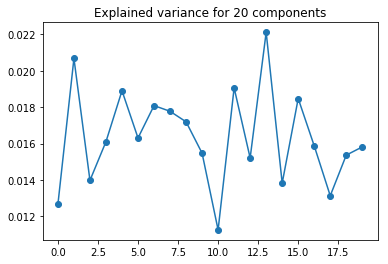

In [7]:
scores = dictlearn._raw_score(data, per_component=True)
plt.plot(scores, '-o')
plt.title('Explained variance for 20 components')

In [ ]:
dictlearn.fit(rest_files_2)

masker = dictlearn.masker_
data2 = np.concatenate(masker.transform(rest_files_2))

In [1]:
scores2 = dictlearn._raw_score(data2, per_component=True)
plt.plot(scores2, '-o')
plt.title('Explained variance for 20 components')

NameError: name 'dictlearn' is not defined

In [ ]:
component_img2 = dictlearn.components_img_
plot_prob_atlas(component_img2, draw_cross=False, linewidths=None,
                         cut_coords=[0, 0, 0], title='Dictionary Learning maps 2nd');

plot_prob_atlas(component_img1, draw_cross=False, linewidths=None,
                         cut_coords=[0, 0, 0], title='Dictionary Learning maps 1st');


In [ ]:
from nilearn.image import math_img
from nilearn import image

In [ ]:
for network_img in image.iter_img(component_img1):
    plot_stat_map(network_img)

In [ ]:
for network_img in image.iter_img(component_img2):
    plot_stat_map(network_img)

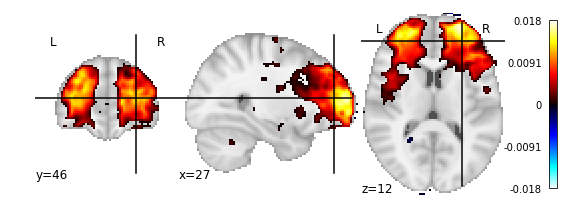

In [9]:
from nilearn.image import concat_imgs, index_img
single_mn_image_1 = index_img(component_img1, 12) # extracting the specific component. 
plot_stat_map(single_mn_image_1)

In [ ]:
from nilearn.image import concat_imgs, index_img
single_mn_image_2 = index_img(component_img2, 7) # extracting the specific component. 
plot_stat_map(single_mn_image_2)

In [ ]:
result_img = math_img("img2 - img1",
                      img1=single_mn_image_1, img2=single_mn_image_2)

view = plot_stat_map(result_img)
view.open_in_browser() 

In [ ]:
from nilearn import plotting
view = plotting.plot_stat_map(result_img) #, surf_mesh='fsaverage')  

In [ ]:
result_img.shape

#for i in image.iter_img(result_img):
 #   plot_stat_map(i)